## Simple GenHarris-ResNet test

In this notebook, we will load a pretrained network and verify that it is invariant to rotation. 

In [1]:
from GenHarrisLayers import *
import matplotlib.pyplot as plt

2023-04-11 15:46:27.286737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load the Fashion-MNIST dataset and chose some images.

In [2]:
(x_train_init, y_train), (x_test_init, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()

begin_index = 100

# Padding
x_test = np.zeros((15, 80, 80))
x_test[:, 26:54, 26:54] = x_test_init[begin_index:begin_index+15,:,:]

x_test = x_test.astype("float32")/255

x_test = np.expand_dims(x_test, -1)

y_test = y_test[begin_index:begin_index+15]

Load the pretrained model.

In [3]:
model = tensorflow.keras.models.load_model('./GenHarris-ResNet.h5', custom_objects = {"GaussianDerivativeESPLayer": GaussianDerivativeESPLayer, "GlobalTopkExtremaPooling2D":GlobalTopkExtremaPooling2D})

2023-04-11 15:46:36.883179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Take a look at it architecture.

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 1)]  0           []                               
                                                                                                  
 gaussian_derivative_esp_layer   (None, 74, 74, 18)  0           ['input_1[0][0]']                
 (GaussianDerivativeESPLayer)                                                                     
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   608         ['gaussian_derivative_esp_layer[0
                                                                 ][0]']                           
                                                                                              

Predict the classes of the upright images.

In [5]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis = -1)
print(predicted_classes.shape)

1/1 [==============================] - 23s 23s/step
(15,)


Display the images and compare the predictions to the true classes. Some of them may be wrong.

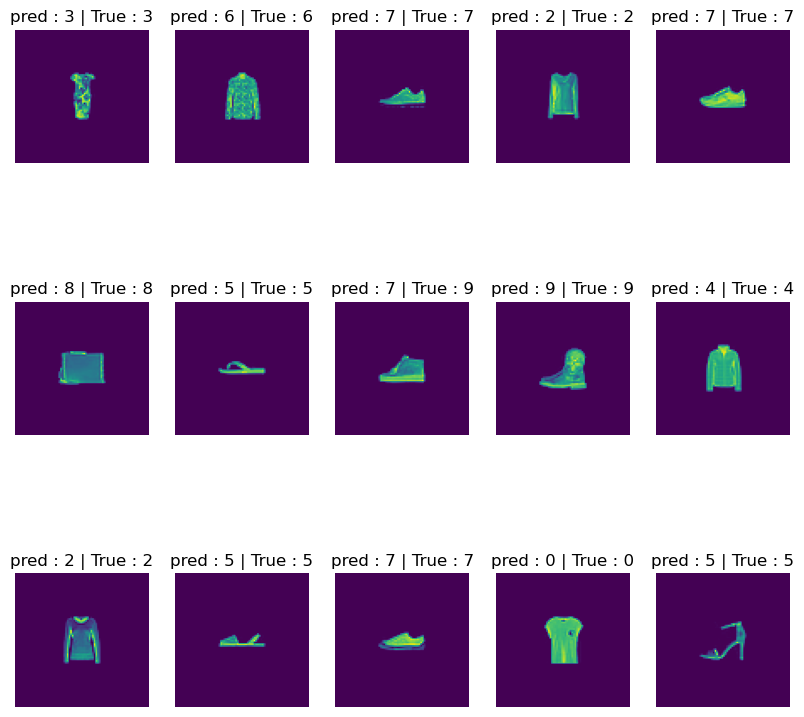

In [6]:
plt.figure(figsize = (10, 10))
for i in range(15):
    plt.subplot(3, 5, i+1), plt.imshow(x_test[i,:,:,0]), plt.title('pred : %s | True : %s' % (predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()    

Let's randomly rotate the images and see if it gives the same predictions.

In [7]:
rotated_images = tensorflow.keras.layers.experimental.preprocessing.RandomRotation(factor = 0.5, fill_mode = 'constant', interpolation = 'bilinear', fill_value = 0.0)(x_test)

In [8]:
new_predictions = model.predict(rotated_images)
new_predicted_classes = np.argmax(new_predictions, axis = -1)

1/1 [==============================] - 17s 17s/step


Display the images and compare the predictions to the previous ones.

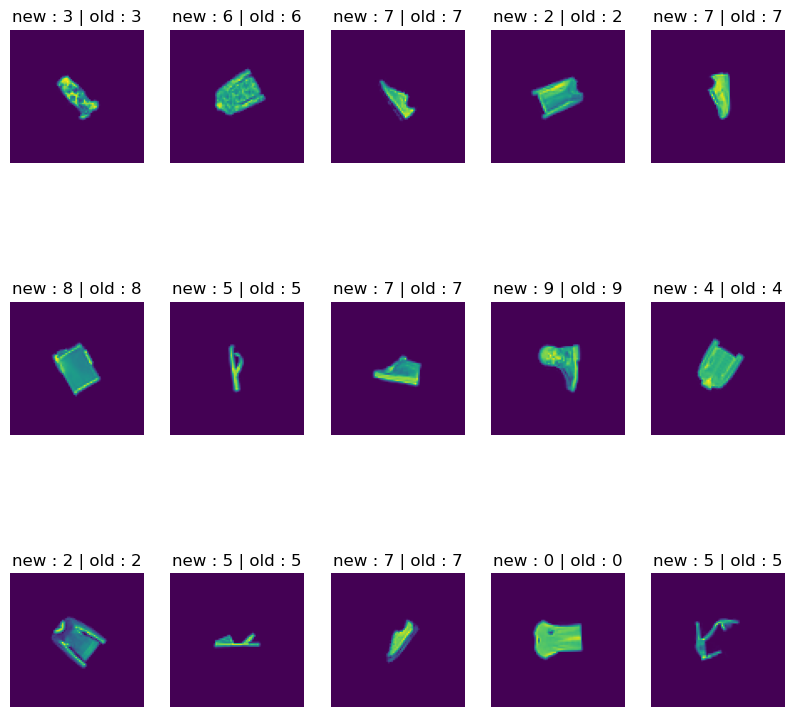

In [9]:
plt.figure(figsize = (10, 10))
for i in range(15):
    plt.subplot(3, 5, i+1), plt.imshow(rotated_images[i,:,:,0]), plt.title('new : %s | old : %s' % (new_predicted_classes[i], predicted_classes[i]))
    plt.axis('off')
plt.show()    